## 1. Giới thiệu dataset

- Đây là tập dữ liệu BankChurners — một bộ dữ liệu giao dịch và thông tin khách hàng của ngân hàng.

- Mỗi dòng tương ứng với một khách hàng, đi kèm nhiều đặc trưng mô tả hành vi sử dụng thẻ tín dụng.

- Dataset được dùng để phân tích và dự đoán khả năng rời bỏ dịch vụ (churn) của khách hàng.


## 2. Khám phá dữ liệu



In [1]:
# 01. Import thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Thêm đường dẫn src để import module
sys.path.append(os.path.abspath(".."))
from src.data_processing import *

# Thiết lập hiển thị đồ họa
%matplotlib inline
plt.style.use('ggplot')

In [9]:
# 02. Load dữ liệu và xác định cột số

file_path = "../data/raw/BankChurners.csv"

header, data_raw = load_csv(file_path)
print("Số dòng dữ liệu:", len(data_raw))
print("Số cột:", len(header))

# Lọc các cột dữ liệu là số
numeric_idx, numeric_cols = detect_numeric_columns(data_raw, header)
data = convert_data(data_raw, numeric_idx)
num_data = data[:, numeric_idx].astype(float)
print("Các cột số:", numeric_cols)

Số dòng dữ liệu: 10127
Số cột: 23
Các cột số: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [3]:
# 03. Thống kê mô tả cho các cột có dữ liệu là số
mean, median, std, min_val, max_val = compute_statistics(num_data)

print(f"{'Feature':30s} {'Mean':>15s} {'Median':>15s} {'Std':>15s} {'Min':>15s} {'Max':>15s}")
print("-"*110)

for i, col in enumerate(numeric_cols):
    print(f"{col[:25]:30s} {mean[i]:15.2f} {median[i]:15.2f} {std[i]:15.2f} {min_val[i]:15.2f} {max_val[i]:15.2f}")


Feature                                   Mean          Median             Std             Min             Max
--------------------------------------------------------------------------------------------------------------
CLIENTNUM                         739177606.33    717926358.00     36901961.36    708082083.00    828343083.00
Customer_Age                             46.33           46.00            8.02           26.00           73.00
Dependent_count                           2.35            2.00            1.30            0.00            5.00
Months_on_book                           35.93           36.00            7.99           13.00           56.00
Total_Relationship_Count                  3.81            4.00            1.55            1.00            6.00
Months_Inactive_12_mon                    2.34            2.00            1.01            0.00            6.00
Contacts_Count_12_mon                     2.46            2.00            1.11            0.00            6.00
C

### Nhận xét tổng quát về thống kê mô tả:

- Tuổi khách hàng trung bình ~46, phần lớn ở độ tuổi trung niên.

- Quan hệ với ngân hàng khá lâu (≈36 tháng), số sản phẩm dùng trung bình 3–4 sản phẩm.

- Giới hạn tín dụng (Credit Limit) rất lệch phải: trung bình 8.632 nhưng median chỉ 4.549 → tồn tại nhiều khách hàng có hạn mức rất cao.

- Giao dịch hàng tháng khá lớn: tổng giao dịch (Total_Trans_Amt) trung bình ~4.400, số giao dịch ~65.

- Mức sử dụng thẻ (Utilization Ratio) thấp: trung bình 0.27 → đa số không xài hết hạn mức.


In [10]:
# 04. Kiểm tra missing value

missing = count_missing(num_data)

print(f"{'Feature':30s} {'Missing':>10s}")
print("-"*45)
for i, col in enumerate(numeric_cols):
    print(f"{col[:25]:30s} {missing[i]:10d}")

cat_data = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 
            'Income_Category', 'Card_Category']

missing_cat = count_missing_categorical(data_raw, header, cat_data)
print(f"\n{'Feature':30s} {'Missing':>10s}")
print("-"*45)
for col, count in missing_cat.items():
    print(f"{col[:25]:30s} {count:10d}")


Feature                           Missing
---------------------------------------------
CLIENTNUM                               0
Customer_Age                            0
Dependent_count                         0
Months_on_book                          0
Total_Relationship_Count                0
Months_Inactive_12_mon                  0
Contacts_Count_12_mon                   0
Credit_Limit                            0
Total_Revolving_Bal                     0
Avg_Open_To_Buy                         0
Total_Amt_Chng_Q4_Q1                    0
Total_Trans_Amt                         0
Total_Trans_Ct                          0
Total_Ct_Chng_Q4_Q1                     0
Avg_Utilization_Ratio                   0
Naive_Bayes_Classifier_At               0
Naive_Bayes_Classifier_At               0

Feature                           Missing
---------------------------------------------
Attrition_Flag                          0
Gender                                  0
Education_Level          

### Nhận xét: không có cột dữ liệu nào bị missing value

Phân phối Attrition_Flag:
Attrited Customer: 1627 (16.07%)
Existing Customer: 8500 (83.93%)


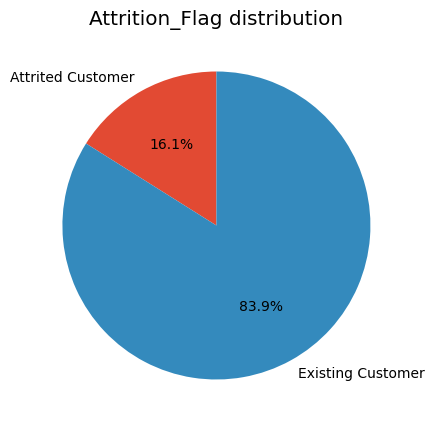

In [ ]:
# 05. Phân phối Attrition_Flag

attr_flag = extract_attrition_flag(data_raw, header)
unique, counts = np.unique(attr_flag, return_counts=True)

print("Phân phối Attrition_Flag:")
for u, c in zip(unique, counts):
    print(f"{u}: {c} ({c/len(attr_flag)*100:.2f}%)")

plt.figure(figsize=(5,5))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title("Attrition_Flag distribution")
plt.show()


### Nhận xét: tỉ lệ khách hàng rời bỏ tương đối cao

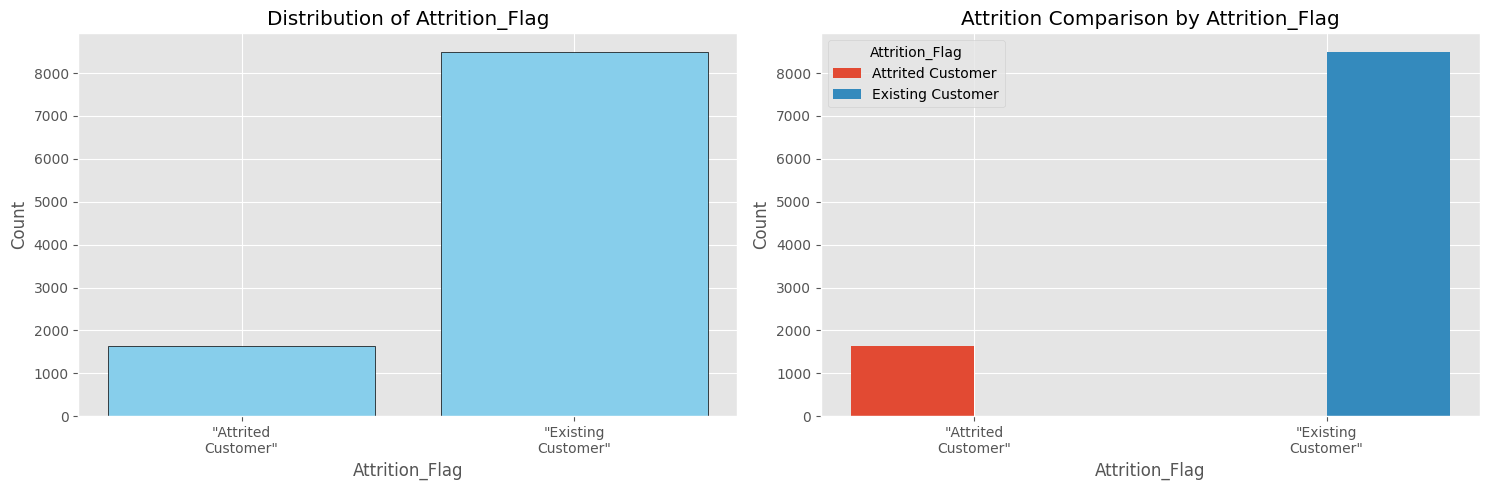

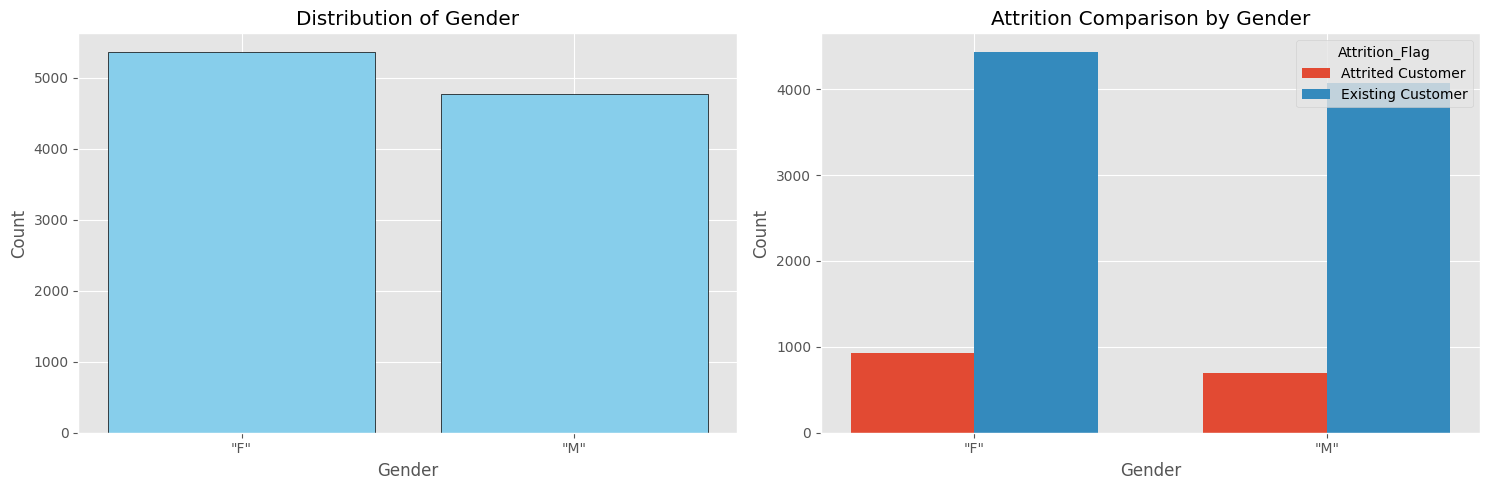

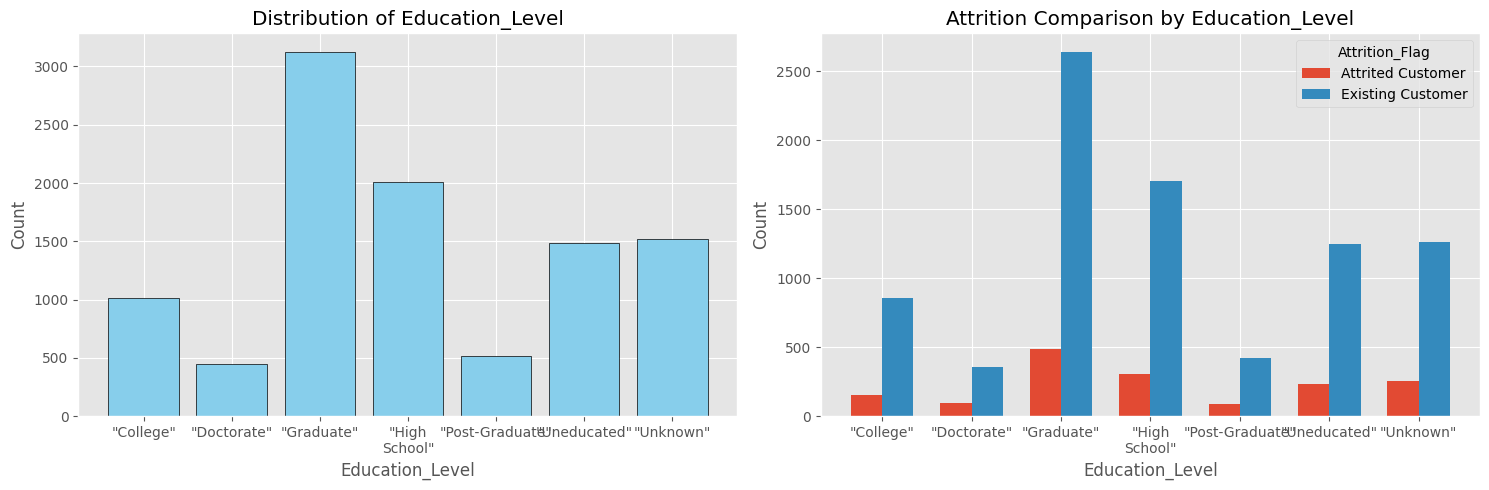

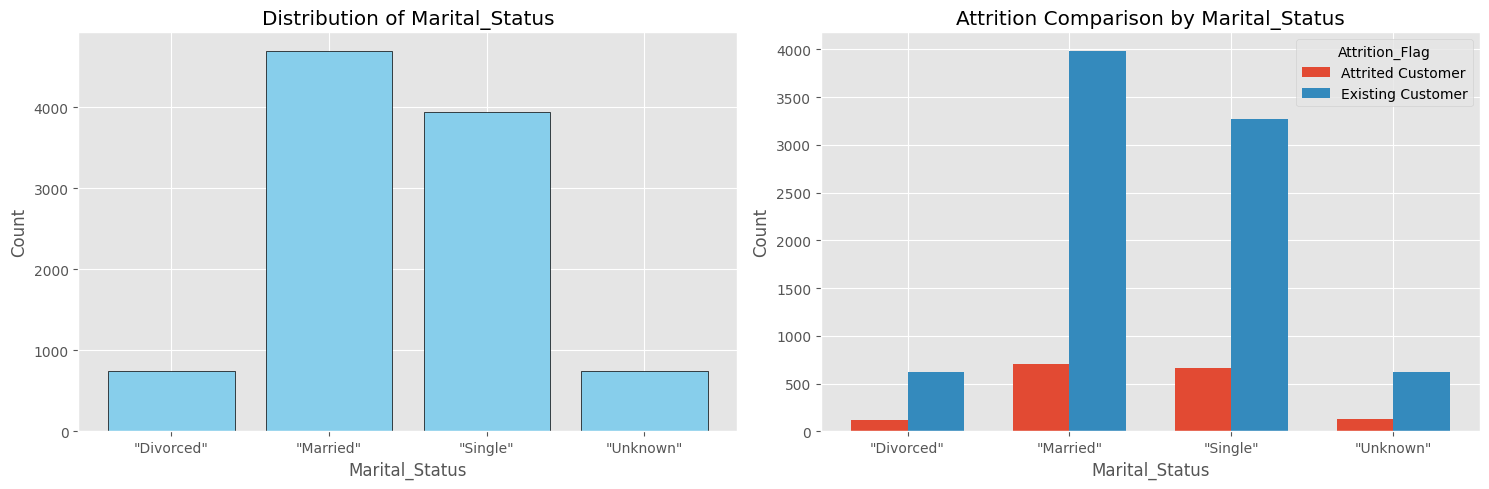

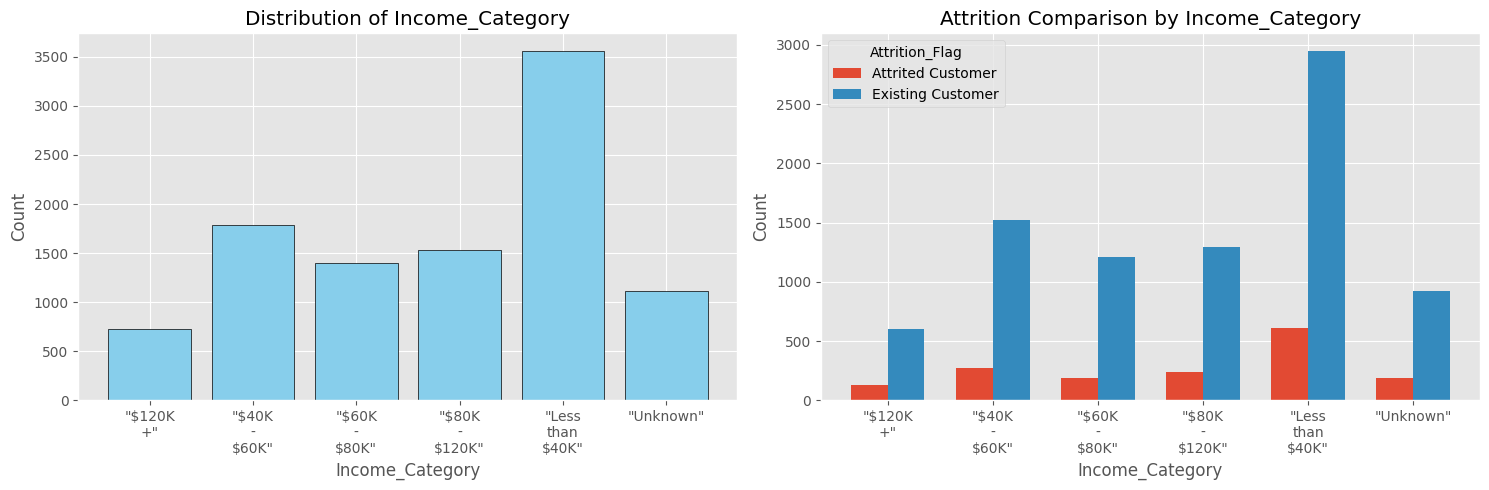

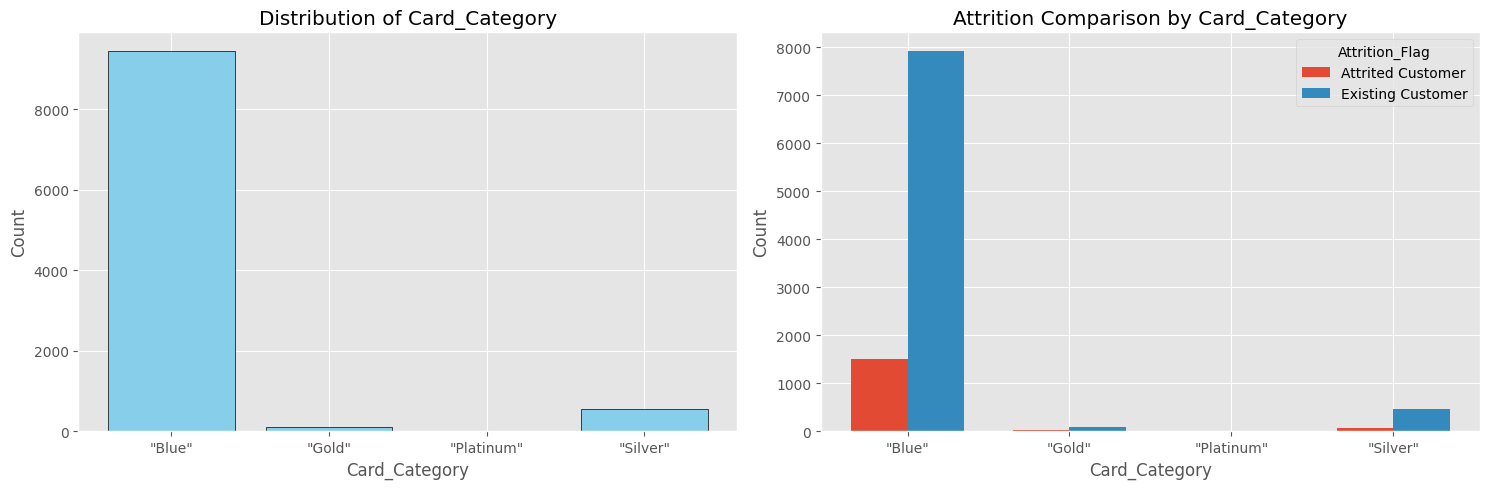

In [11]:
# 06. Phân bố các cột phân loại

# Vẽ biểu đồ cho từng cột trong cat_data
for col in cat_data:
    col_idx = header.index(col)
    col_data = np.array([row[col_idx] for row in data_raw])
    unique_vals, counts_single = np.unique(col_data, return_counts=True)

    fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

    # Biểu đồ phân bố chung
    axes[0].bar([shorten(u) for u in unique_vals], counts_single, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_ylabel("Count")
    axes[0].set_xlabel(shorten(col))

    # Biểu đồ phân bố theo Attrition_Flag 
    cat_vals, target_vals, counts = get_grouped_counts(col_data, attr_flag)
    x_labels = [shorten(val) for val in cat_vals]
    width = 0.35
    x = np.arange(len(cat_vals))
    ax1 = axes[1]
    target_order = ['Attrited Customer', 'Existing Customer'] if len(target_vals) == 2 else target_vals

    for i, t_val in enumerate(target_order):
        offset = (i - (len(target_order)-1)/2) * width
        ax1.bar(x + offset, counts.get(t_val, [0]*len(cat_vals)), width, label=t_val)

    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels)
    ax1.set_ylabel('Count')
    ax1.set_xlabel(shorten(col))
    ax1.set_title(f"Attrition Comparison by {col}")
    ax1.legend(title='Attrition_Flag')

    plt.tight_layout()
    plt.show()


### Nhận xét:

- `Gender`: Phân bố giữa nam (M) và nữ (F) tương đối cân bằng.

- `Education_Level`: Nhóm Graduate và High School chiếm đa số. 

- `Marital_Status`: Nhóm Married và Single là hai nhóm lớn nhất.

- `Income_Category`: Phân bố tập trung ở nhóm thu nhập trung bình thấp ( less than $40k ).

- `Card_Category`: Phần lớn khách hàng sử dụng loại thẻ Blue. Các loại thẻ cao cấp hơn (Silver, Gold, Platinum) chiếm tỷ lệ rất nhỏ.

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


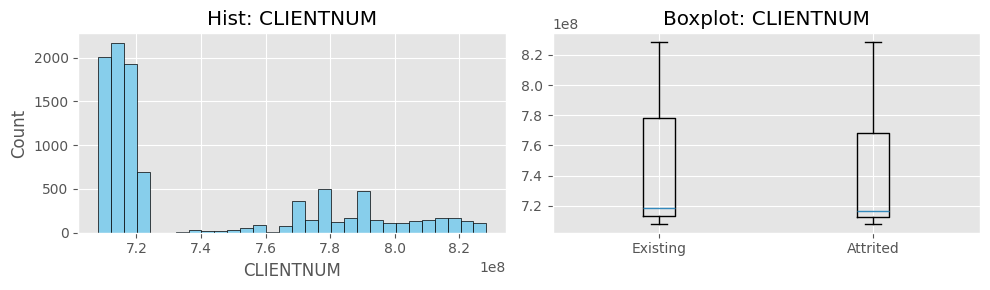

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


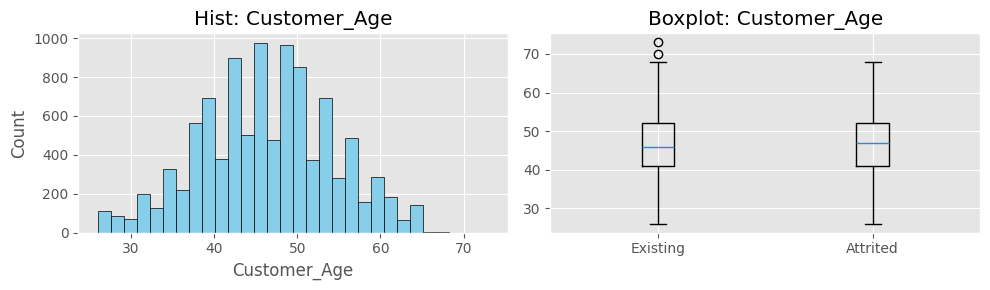

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


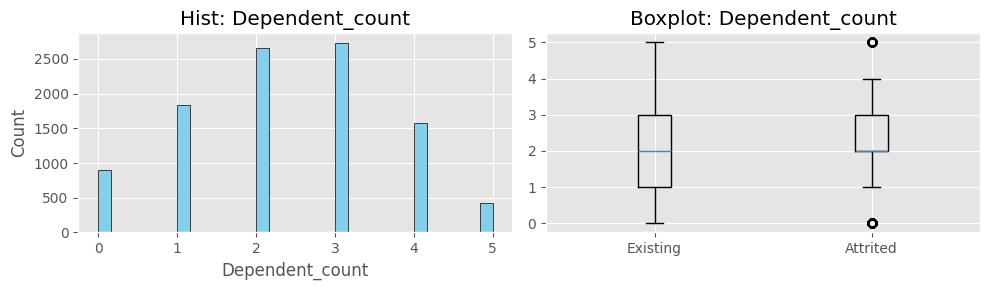

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


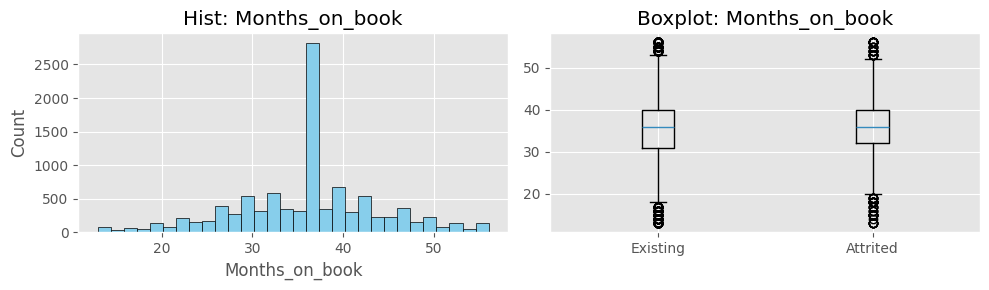

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


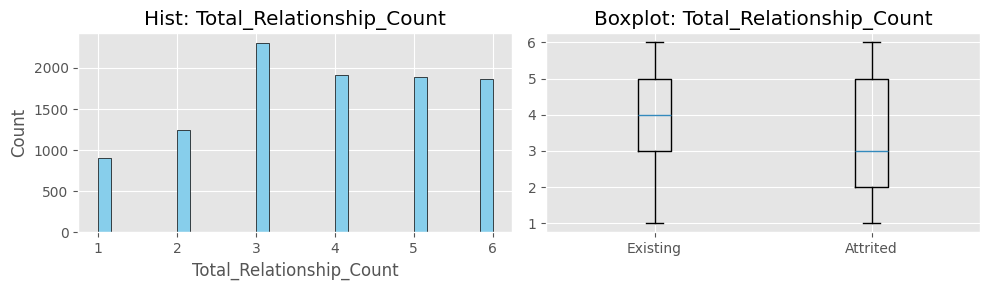

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


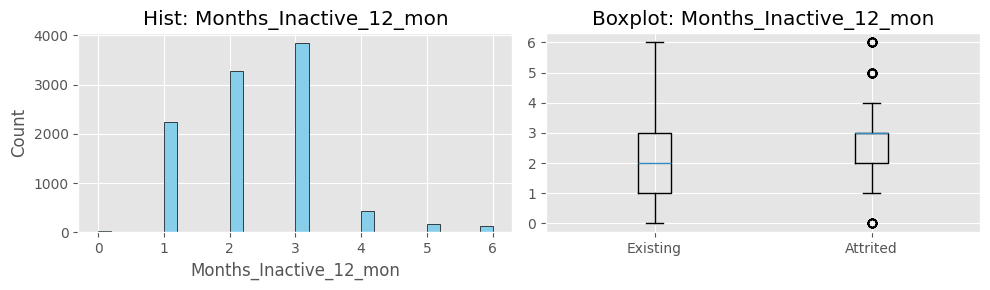

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


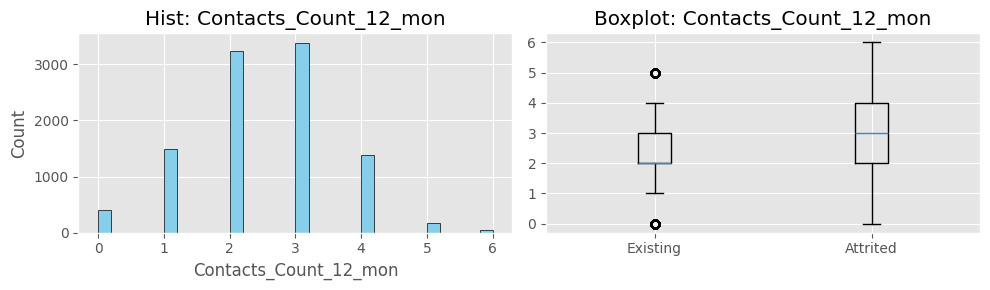

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


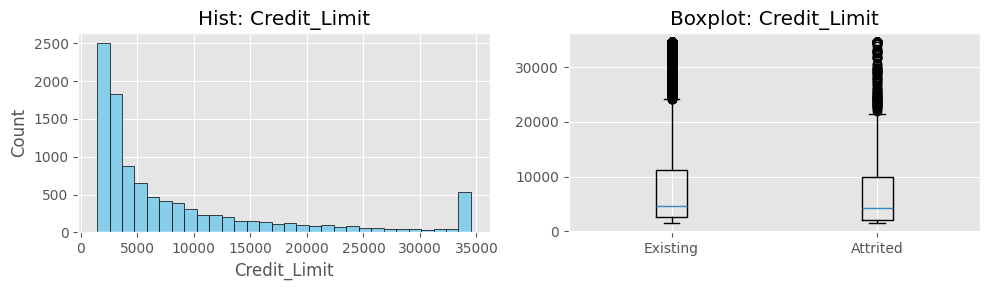

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


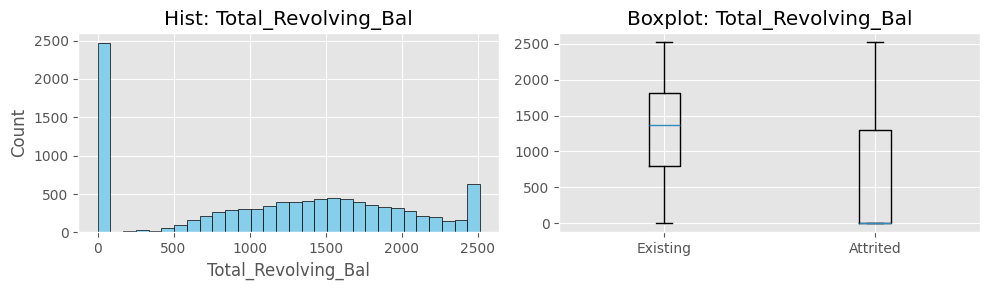

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


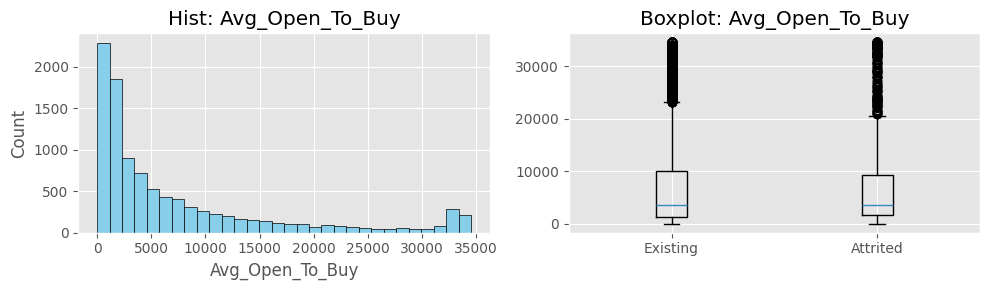

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


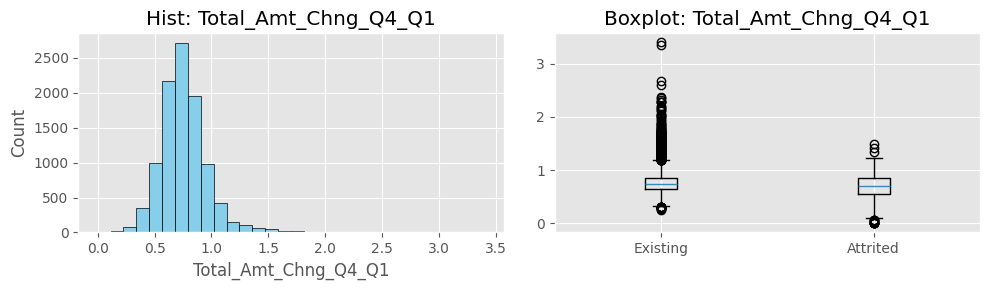

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


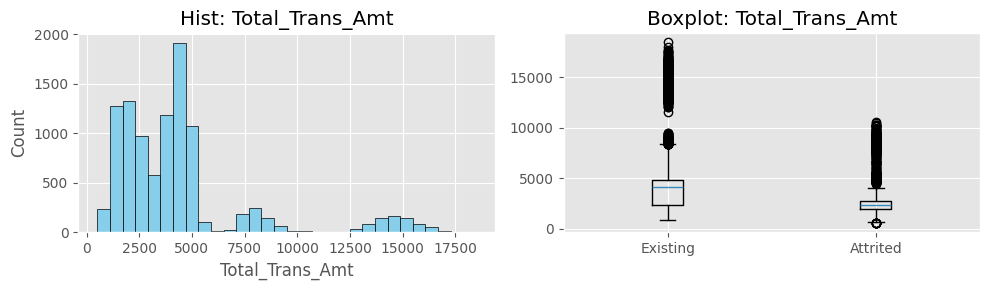

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


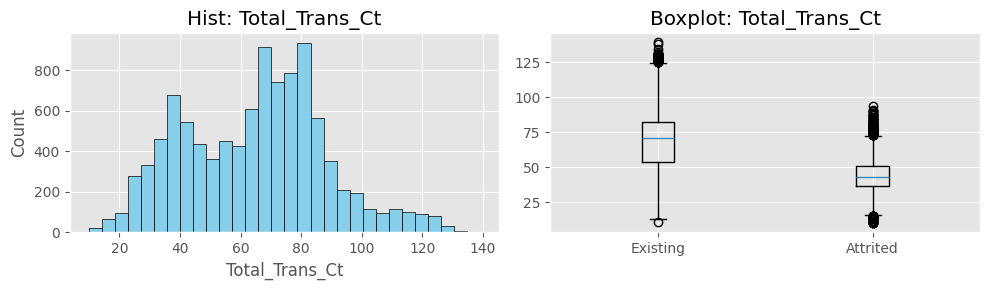

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


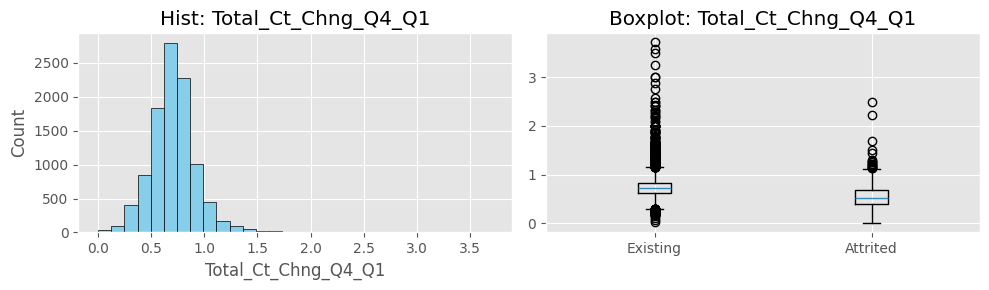

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


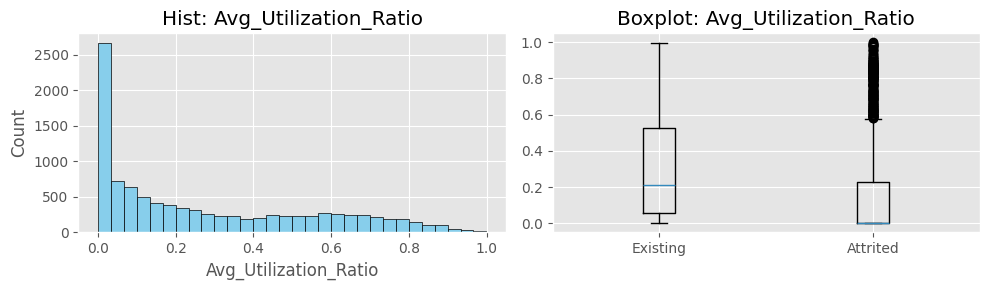

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


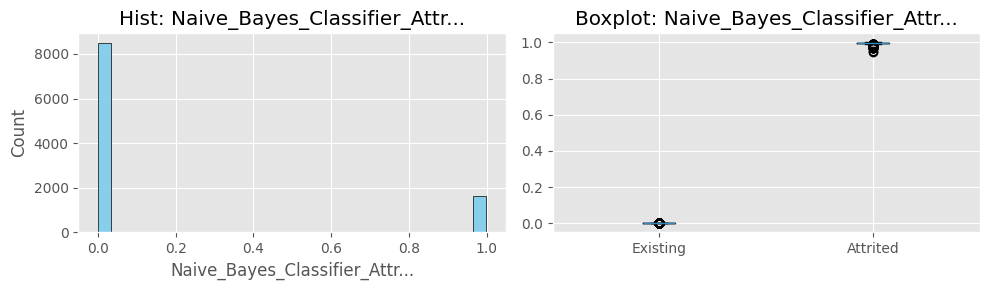

C:\Users\HP\AppData\Local\Temp\ipykernel_14716\1851632192.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])


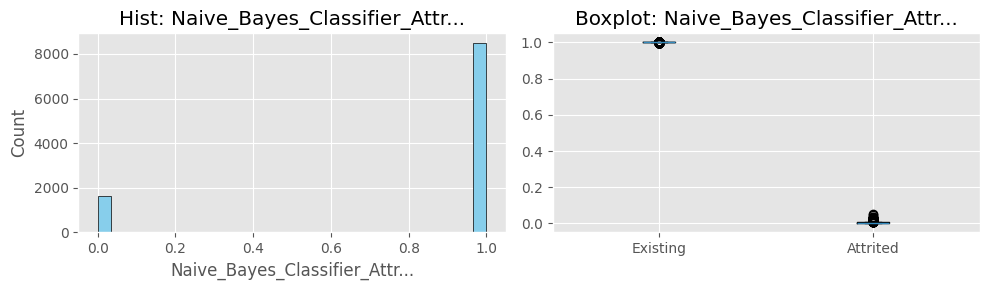

In [12]:
# 07. Phân bố các cột số

def shorten_col(col, max_len=30):
    return col if len(col) <= max_len else col[:max_len-3] + "..."

for i, col in enumerate(numeric_cols):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Histogram
    axes[0].hist(num_data[:, i], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Hist: {shorten_col(col)}")
    axes[0].set_xlabel(shorten_col(col))
    axes[0].set_ylabel("Count")
    
    # Boxplot theo Attrition_Flag
    existing = num_data[np.array(attr_flag)=='Existing Customer', i]
    attrited = num_data[np.array(attr_flag)=='Attrited Customer', i]
    axes[1].boxplot([existing, attrited], labels=['Existing','Attrited'])
    axes[1].set_title(f"Boxplot: {shorten_col(col)}")
    
    plt.tight_layout()
    plt.show()


### Nhận xét:

- Total_Trans_Amt (Tổng lượng giao dịch): Quan sát sự khác biệt rõ rệt về trung vị và phân phối. Nhóm Attrited Customer có vẻ có tổng lượng giao dịch thấp hơn đáng kể so với nhóm Existing Customer. Đây là một đặc trưng dự đoán churn rất mạnh.

- Total_Trans_Ct (Tổng số lần giao dịch): Tương tự như Total_Trans_Amt, số lần giao dịch của nhóm khách hàng đã rời bỏ cũng thấp hơn.

- Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức): Nhóm Attrited Customer có xu hướng có tỷ lệ sử dụng hạn mức thẻ tín dụng thấp hơn so với nhóm Existing Customer (Trung vị của nhóm churn gần 0 hơn).

- Credit_Limit (Hạn mức tín dụng): Có sự khác biệt về hạn mức tín dụng giữa hai nhóm, nhưng có thể không quá rõ ràng bằng các biến giao dịch. Biến này có vẻ lệch phải (như đã nhận xét), cho thấy có outliers (khách hàng VIP) với hạn mức rất cao.

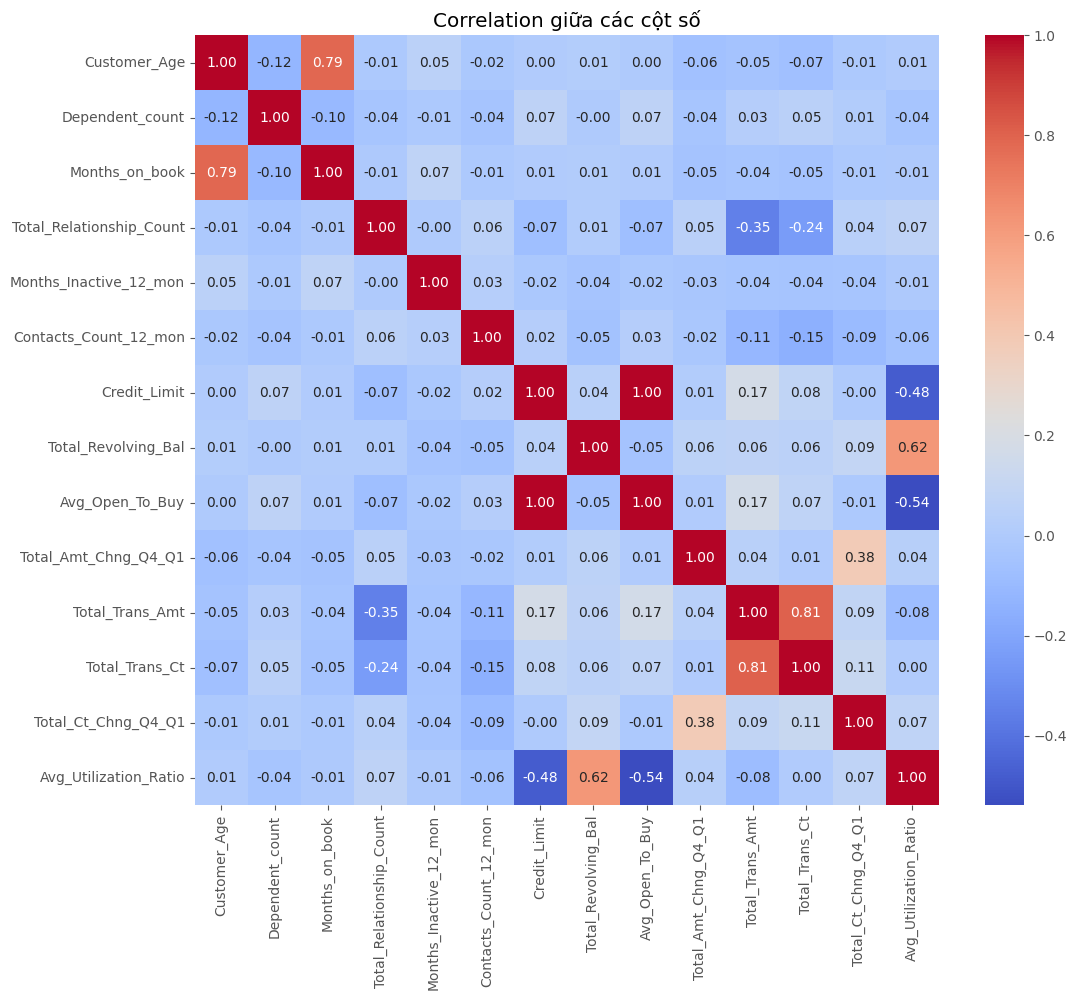

In [15]:
# 08. Correlation heatmap

num_cols_full = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

num_idx_full = [header.index(c) for c in num_cols_full]
num_data_full = np.array([[float(row[i]) for i in num_idx_full] for row in data_raw])

corr_matrix = np.corrcoef(num_data_full.T)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, xticklabels=num_cols_full, yticklabels=num_cols_full, 
            cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation giữa các cột số")
plt.show()


### Nhận xét:

- Tương quan mạnh giữa các biến giao dịch (Collinearity):
    - Có mối tương quan rất mạnh giữa Total_Trans_Amt (Tổng lượng giao dịch) và Total_Trans_Ct (Tổng số lần giao dịch) ($r \approx 0.81$). Điều này là do giao dịch nhiều lần thường đi kèm với tổng giá trị giao dịch cao hơn.
    - Credit_Limit và Avg_Open_To_Buy cũng có tương quan rất cao ($r \approx 0.99$), vì hạn mức khả dụng (Avg_Open_To_Buy) gần như bằng Hạn mức tín dụng (Credit_Limit) trừ đi Số dư tuần hoàn (Total_Revolving_Bal), và Total_Revolving_Bal thường nhỏ hơn Credit_Limit.
